In [3]:
%pip install selenium


  Using cached selenium-4.29.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached trio-0.29.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached selenium-4.29.0-py3-none-any.whl (9.5 MB)
Using cached trio-0.29.0-py3-none-any.whl (492 kB)
Using cached trio_websocket-0.12.2-py3-none-any.whl (21 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Rejeter
Se connecter


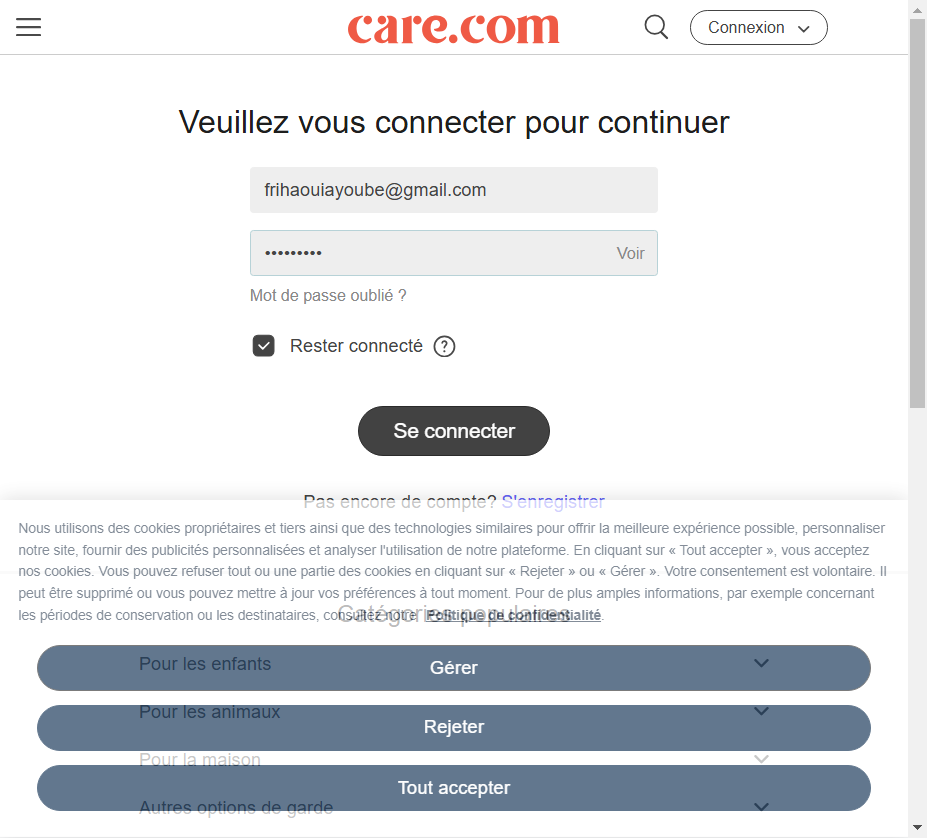

{'level': 'SEVERE', 'message': 'https://www.partner-betreut.de/go.cgi?target=%2Ffr-fr%2Flogin - Failed to load resource: net::ERR_CERT_COMMON_NAME_INVALID', 'source': 'network', 'timestamp': 1742829561966}
{'level': 'WARNING', 'message': 'https://www.care.com/fr-fr/login - <meta name="apple-mobile-web-app-capable" content="yes"> is deprecated. Please include <meta name="mobile-web-app-capable" content="yes">', 'source': 'other', 'timestamp': 1742829563211}
Cookies: [{'domain': 'www.care.com', 'expiry': 1777389570, 'httpOnly': True, 'name': 'intl_mid', 'path': '/', 'sameSite': 'Lax', 'secure': True, 'value': '14d6d6cd-064c-4806-85c0-8eee99aa7661'}, {'domain': 'www.care.com', 'expiry': 1750605572, 'httpOnly': True, 'name': 'intl_member', 'path': '/', 'sameSite': 'Lax', 'secure': True, 'value': '38e34ac206334a67d3acd697d8b5b4b1f093e35ae9b6119ed15bb0ba76ab5f5cf9953e6e378feb994fcf8f966f9d623b3a35d57eb79f9aa1a17202c0dcf190228fa0c8dd83e6277e03a390c5e2295460b51feabfb3170cefe593dd9941034bb556ee

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up headless Chrome options
chrome_options = Options()
#chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Initialize the driver (make sure you have the correct chromedriver installed)
driver = webdriver.Chrome(options=chrome_options)

try:
    # Navigate to the login page
    driver.get("https://www.care.com/fr-fr/login")
    
    # Wait until the email input is present (adjust the timeout as needed)
    wait = WebDriverWait(driver, 10)
    # Execute JavaScript to remove the overlay element
    driver.execute_script("document.querySelector('.onetrust-pc-dark-filter').remove();")
    email_input = wait.until(EC.presence_of_element_located((By.ID, "j_username")))
    password_input = driver.find_element(By.ID, "j_password")
    
    # Enter your credentials (replace with your actual credentials or fetch from secure storage)
    email_input.send_keys("frihaouiayoube@gmail.com")
    password_input.send_keys("07vk640xz")
    
    reject = driver.find_element(By.ID, "onetrust-reject-all-handler")
    if reject:
        print(reject.text)
        reject.click()
    else:
        print("reject not found")
    wait = WebDriverWait(driver, 10)
    
    # Submit the form (you might need to click the login button)
    login_button = driver.find_element(By.ID, "32641-login-btn")
    print(login_button.text)
    login_button.click()
    
    wait = WebDriverWait(driver, 10)
    # Take a screenshot and save it
    driver.save_screenshot("debug.png")

    # Display the screenshot in the notebook
    from IPython.display import Image, display
    display(Image("debug.png"))
    for entry in driver.get_log("browser"):
        print(entry)
    
    # Wait for some element on the post-login page or check URL change to ensure login success
    wait.until(EC.url_contains("/my-account"))  # adjust as per the expected URL
    #dashboard_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".inboxIcon icon")))
    
    # Extract cookies
    cookies = driver.get_cookies()
    print("Cookies:", cookies)
    
    # (Optional) Save cookies to a config file or other storage
    # with open('config.py', 'w') as f:
    #     f.write("COOKIES = " + repr(cookies))
    
finally:
    driver.quit()


In [2]:
%pip install pgeocode 
%pip install great_expectations
%pip install pandera

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/264.2 kB ? eta -:--:--
   ---------------------------------------- 264.2/264.2 kB 8.2 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import etl.data_quality_check as dq

dq.run_check()


2025-03-25 15:18:44,762 - INFO - Loaded 40 profiles from ..\data\raw_data\France\13001\Profiles_of_childCare__ for postal code 13001 (Marseille 01, Marseille).
2025-03-25 15:18:44,775 - INFO - Loaded 40 profiles from ..\data\raw_data\France\13001\Profiles_of_childCare__babysitter for postal code 13001 (Marseille 01, Marseille).
2025-03-25 15:18:44,786 - INFO - Loaded 28 profiles from ..\data\raw_data\France\13001\Profiles_of_childCare__childminder for postal code 13001 (Marseille 01, Marseille).
2025-03-25 15:18:44,795 - INFO - Loaded 25 profiles from ..\data\raw_data\France\13001\Profiles_of_childCare__nanny for postal code 13001 (Marseille 01, Marseille).
2025-03-25 15:18:44,798 - INFO - Loaded 2 profiles from ..\data\raw_data\France\13001\Profiles_of_seniorCare__ for postal code 13001 (Marseille 01, Marseille).
2025-03-25 15:18:44,953 - INFO - Loaded 16 profiles from ..\data\raw_data\France\33000\Profiles_of_childCare__ for postal code 33000 (Bordeaux).
2025-03-25 15:18:44,958 - INF

In [ ]:
%pip install sqlalchemy 
%pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from etl.sql_modeling import run_etl
try:
    run_etl()
except Exception as e:
    print(e)

2025-03-26 14:07:36,799 - INFO - Loaded 498 rows from CSV.
2025-03-26 14:07:49,614 - INFO - Data inserted successfully!
